In [62]:
import glob
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

evaluation_methods = ['ari', 'nmi', 'purity']
ari_best_result = dict()
nmi_best_result = dict()
purity_best_result = dict()


In [63]:
for dirs in glob.glob('b10_p100/*'):
    for em in evaluation_methods:
        with open(dirs + '/' + em + '/total_best_result.txt') as f:
            lines = f.read().splitlines()
            for i, line in enumerate(lines):
                if i == 0: continue
                line = line.split('=')[-1].split(':')
                v = line[-1].strip()
                k = int(dirs.split('csv_')[-1].split('_')[-1])
                if k in range(5):
                    k = 0
                
                if em == 'ari':
                    if k in ari_best_result:
                        ari_best_result[k] += float(v)
                    else:
                        ari_best_result[k] = float(v)
                elif em == 'nmi':
                    if k in nmi_best_result:
                        nmi_best_result[k] += float(v)
                    else:
                        nmi_best_result[k] = float(v)
                else:
                    if k in purity_best_result:
                        purity_best_result[k] += float(v.split('%')[0])
                    else:
                        purity_best_result[k] = float(v.split('%')[0])

In [64]:
for k, v in ari_best_result.items():
    ari_best_result[k] = round(v / 5, 3)
for k, v in nmi_best_result.items():
    nmi_best_result[k] = round(v / 5, 3)
for k, v in purity_best_result.items():
    purity_best_result[k] = round(v / (5 * 100), 3)

print(ari_best_result)
print(nmi_best_result)
print(purity_best_result)

{1500: 0.264, 2000: 0.262, 400: 0.269, 1400: 0.266, 1900: 0.265, 1300: 0.262, 2100: 0.261, 1700: 0.268, 1000: 0.264, 2400: 0.259, 1100: 0.265, 0: 0.263, 2200: 0.254, 700: 0.256, 300: 0.267, 900: 0.258, 1600: 0.26, 2300: 0.259, 1800: 0.263, 1200: 0.263, 800: 0.266, 200: 0.251, 600: 0.26, 500: 0.26, 100: 0.265}
{1500: 0.528, 2000: 0.524, 400: 0.532, 1400: 0.53, 1900: 0.527, 1300: 0.525, 2100: 0.524, 1700: 0.531, 1000: 0.527, 2400: 0.52, 1100: 0.527, 0: 0.525, 2200: 0.518, 700: 0.524, 300: 0.532, 900: 0.523, 1600: 0.524, 2300: 0.523, 1800: 0.526, 1200: 0.527, 800: 0.528, 200: 0.517, 600: 0.525, 500: 0.524, 100: 0.529}
{1500: 0.349, 2000: 0.339, 400: 0.316, 1400: 0.328, 1900: 0.35, 1300: 0.354, 2100: 0.346, 1700: 0.347, 1000: 0.333, 2400: 0.345, 1100: 0.341, 0: 0.348, 2200: 0.341, 700: 0.305, 300: 0.315, 900: 0.339, 1600: 0.34, 2300: 0.35, 1800: 0.333, 1200: 0.319, 800: 0.331, 200: 0.304, 600: 0.334, 500: 0.298, 100: 0.287}


In [65]:
df_ari = pd.DataFrame(list(ari_best_result.items()), columns=['parameters', 'ari'])
df_nmi = pd.DataFrame(list(nmi_best_result.items()), columns=['parameters', 'nmi'])
df_purity = pd.DataFrame(list(purity_best_result.items()), columns=['parameters', 'purity'])


In [67]:
# Adjust values with previous experiments
df_ari.loc[df_ari['parameters'] == 0, 'ari'] = 0.267
df_nmi.loc[df_nmi['parameters'] == 0, 'nmi'] = 0.533
df_purity.loc[df_purity['parameters'] == 0, 'purity'] = 0.316


In [68]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


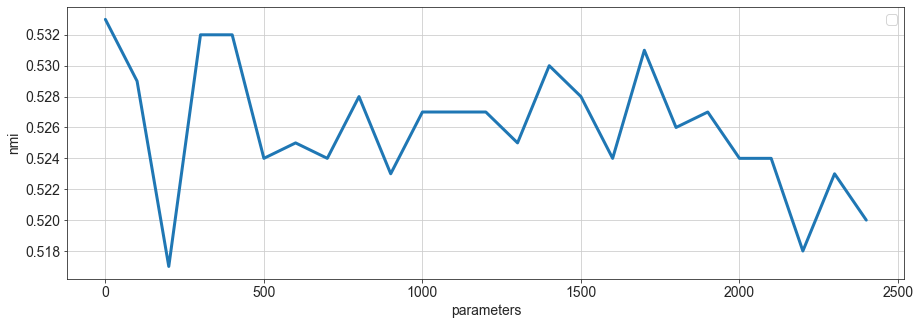

In [69]:
plt.figure(figsize=(15,5))
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#455E85']
sns.lineplot(x='parameters', y='nmi', data=df_nmi, linewidth=3, palette=colors, markers=True, markersize=14)
#for i in df_nmi.groupby('types'):
#   plt.text(i - 0.2 , y + 0.0051, m)
#plt.ylim(0.34, 0.56)
#plt.ylabel('NMI' + r' ($\beta$=0.2)', fontsize=16)
#plt.xlabel(r'$\gamma$')
plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


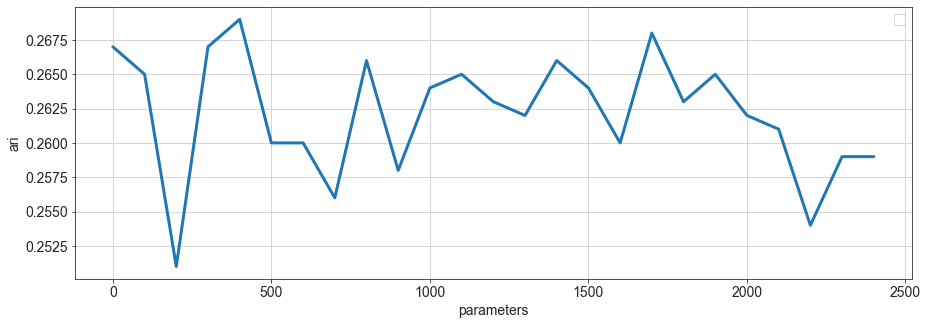

In [55]:
plt.figure(figsize=(15,5))
colors = ['#455E85']
sns.lineplot(x='parameters', y='ari', data=df_ari, linewidth=3, palette=colors, markers=True, markersize=14)
#for i in df_nmi.groupby('types'):
#   plt.text(i - 0.2 , y + 0.0051, m)
#plt.ylim(0.34, 0.56)
#plt.ylabel('NMI' + r' ($\beta$=0.2)', fontsize=16)
#plt.xlabel(r'$\gamma$')
plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


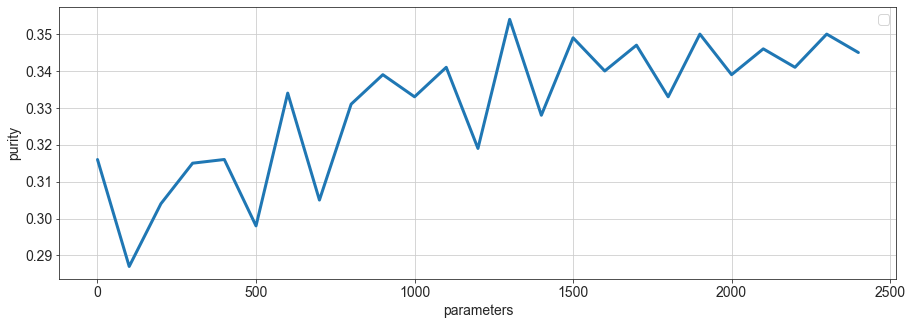

In [56]:
plt.figure(figsize=(15,5))
colors = ['#455E85']
sns.lineplot(x='parameters', y='purity', data=df_purity, linewidth=3, palette=colors, markers=True, markersize=14)
#for i in df_nmi.groupby('types'):
#   plt.text(i - 0.2 , y + 0.0051, m)
#plt.ylim(0.34, 0.56)
#plt.ylabel('NMI' + r' ($\beta$=0.2)', fontsize=16)
#plt.xlabel(r'$\gamma$')
plt.legend(loc='best')